In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json

In [131]:
files = !ls -t *.json
files

['iterations_1e-1_ell_only_20240911-1341.json',
 'iterations_1e-1_ell_only_20240911-1326.json',
 'iterations_1e-1_ell_only_20240911-1327.json',
 'iterations_1e-1_ell_only_20240911-1321.json',
 'iterations_1e-1_ell_only_20240911-1150.json',
 'iterations_1e-1_ell_only_20240911-1119.json',
 'iterations_1e-1_ell_only_20240911-1017.json',
 'iterations_1e-1_ell_only_20240911-1014.json',
 'iterations_1e-1_ell_only_20240911-1013.json',
 'iterations_1e-1_ell_only_20240911-1006.json',
 'iterations_1e-1_ell_only_20240911-0952.json',
 'iterations_1e-1_ell_only_20240911-0948.json',
 'iterations_1e-1_ell_only_20240911-0935.json',
 'iterations_1e-1_ell_only_20240830-1404.json',
 'iterations_1e-1_ell_only_20240830-1305.json',
 'iterations_1e-1_ell_only_20240830-1050.json',
 'iterations_1e-1_ell_only_20240830-1030.json',
 'iterations_1e-1_ell_only_20240830-0943.json',
 'iterations_1e-1_ell_only_20240829-1408.json',
 'iterations_1e-1_ell_only_20240829-1344.json',
 'iterations_1e-1_ell_only_20240829-1328

# Load $\sigma_n$ dictionary

In [132]:
path = os.getcwd()
file = os.path.join(path,files[1])
with open(file, 'r') as f:
    data = json.load(f)

In [133]:
data

{'pde': {'dim': 2,
  'kappa': [0.0, 1.0, 0.8, 0.6, 0.4, 0.5, 0.3, 0.2, 0.1, 0.7],
  'theta': [0.0, 0.4, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1],
  'nu': [0.0, 0.2, 0.15, 0.11, 0.12, 0.1, 0.13, 0.14, 0.14, 0.1],
  'lb': [0.0, 1.5, 1.11, 0.12, 0.13, 0.15, 0.11, 0.12, 0.13, 0.15],
  'rho': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'eta': 0.5,
  'T': 1.0},
 'simulation': {'num_samples': 1024,
  'num_time_intervals': 10,
  'start': 0.0,
  'end': 1.0,
  'num_neurons': 4},
 'optimal': 3.0,
 'bounds': 8.0,
 '0': {'ell': {'min': 0.0,
   'mean': 0.0,
   'median': 0.0,
   'max': 0.0,
   'std': 0.0,
   'bound': 0.0},
  'sigma': {'min': 1.7,
   'mean': 1.6999999999999997,
   'median': 1.7,
   'max': 1.7,
   'std': 2.2205544774091416e-16}},
 '1': {'ell': {'min': -1.3905462751944615,
   'mean': 0.22817048388136268,
   'median': 0.18583924671388438,
   'max': 8.0,
   'std': 0.1588951084071094,
   'bound': 8.0},
  'sigma': {'min': 0.30945372480553845,
   'mean': 1.9281704838813627,
   'medi

In [134]:
n = int(list(data.keys())[-1])
n

9

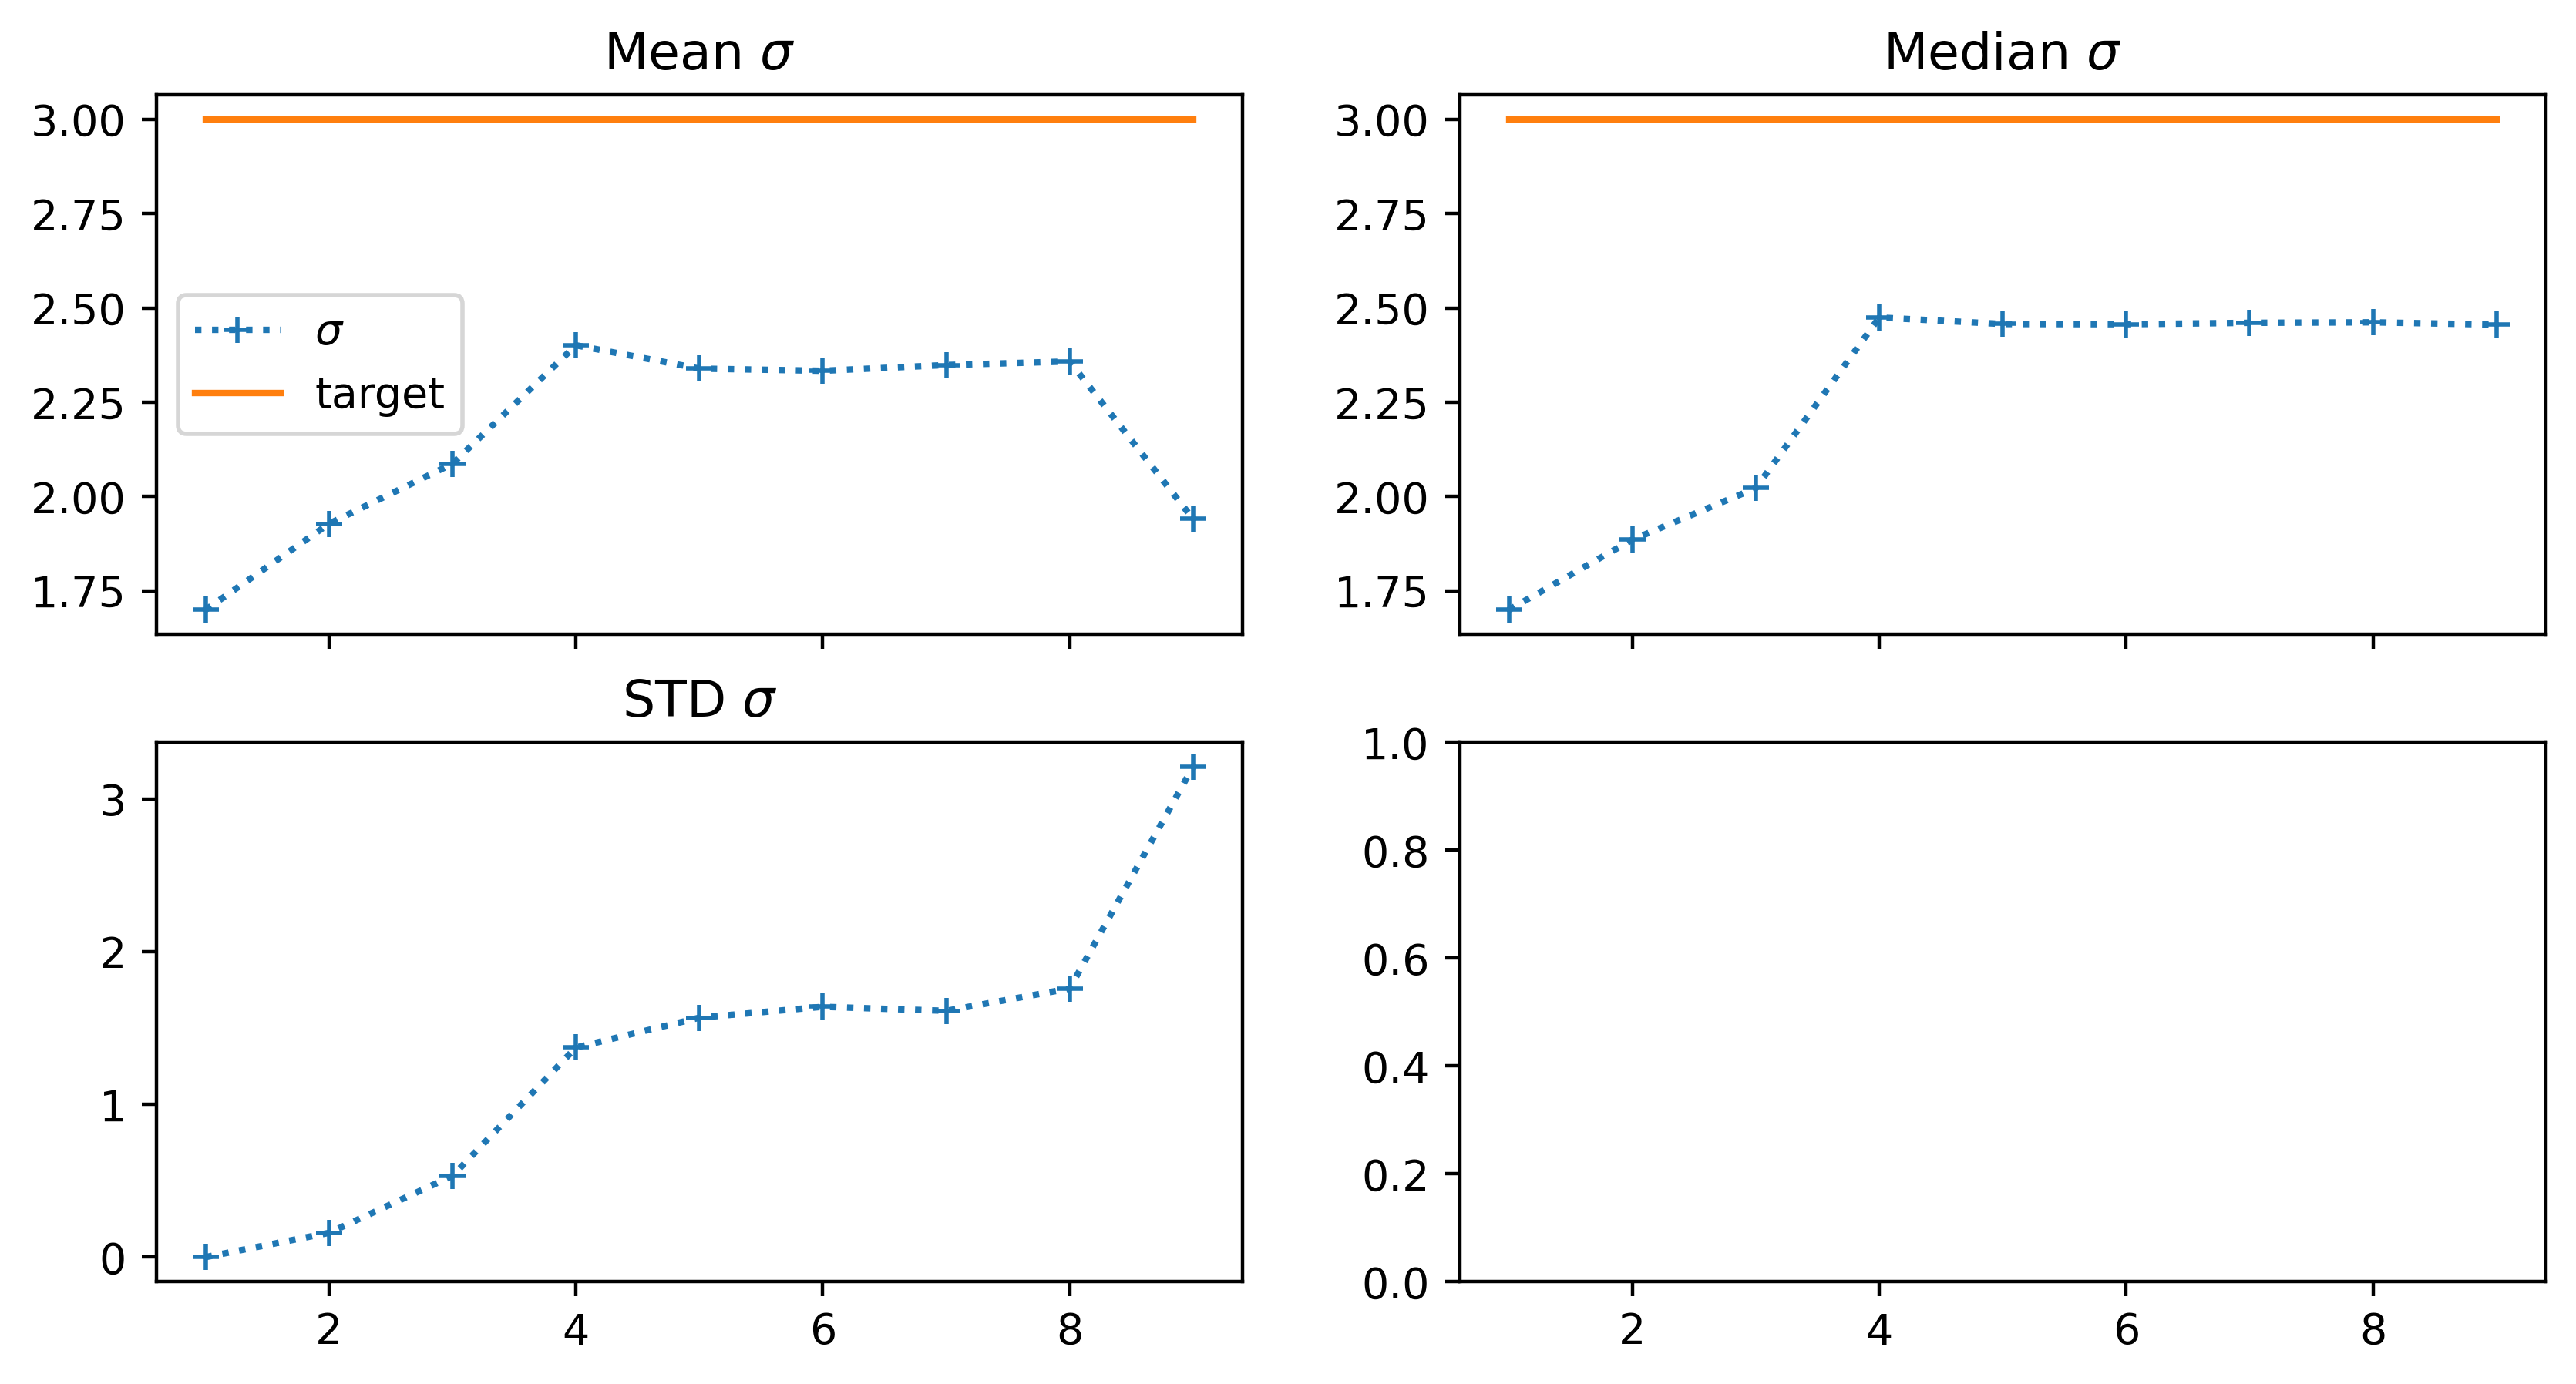

In [135]:
f , ax  = plt.subplots(2,2,figsize=(10,5),dpi=400,sharex = True);
for i in range(0,n):
    if i == 0:
        x0 = np.array([[i+1,data[str(i)]['sigma']['mean']]])
        x1 = np.array([[i+1,data[str(i)]['sigma']['median']]]) 
        x2 = np.array([[i+1,data[str(i)]['sigma']['std']]])        
    elif i == 1:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['sigma']['mean']]])),axis=0)
        # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
        # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['sigma']['median']]])),axis=0)
        # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
        # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['sigma']['std']]])),axis=0)
        # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
        # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
    else:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['sigma']['mean']]])),axis=0)
        # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
        # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['sigma']['median']]])),axis=0)
        # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
        # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['sigma']['std']]])),axis=0)
        # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
        # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
ax[0][0].plot(x0[:,0],x0[:,1],label = r'$\sigma$',linestyle=':', marker='+')
# ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
ax[0][0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
ax[0][0].set_title(r'Mean $\sigma$');
# ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
ax[0][1].plot(x1[:,0],x1[:,1],label = r'$\sigma$',linestyle=':', marker='+')
# ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
# ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
ax[0][1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
ax[0][1].set_title(r'Median $\sigma$');
ax[1][0].plot(x2[:,0],x2[:,1],label = r'$\sigma$',linestyle=':', marker='+')
# ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
ax[1][0].set_title(r'STD $\sigma$');
ax[0][0].legend();

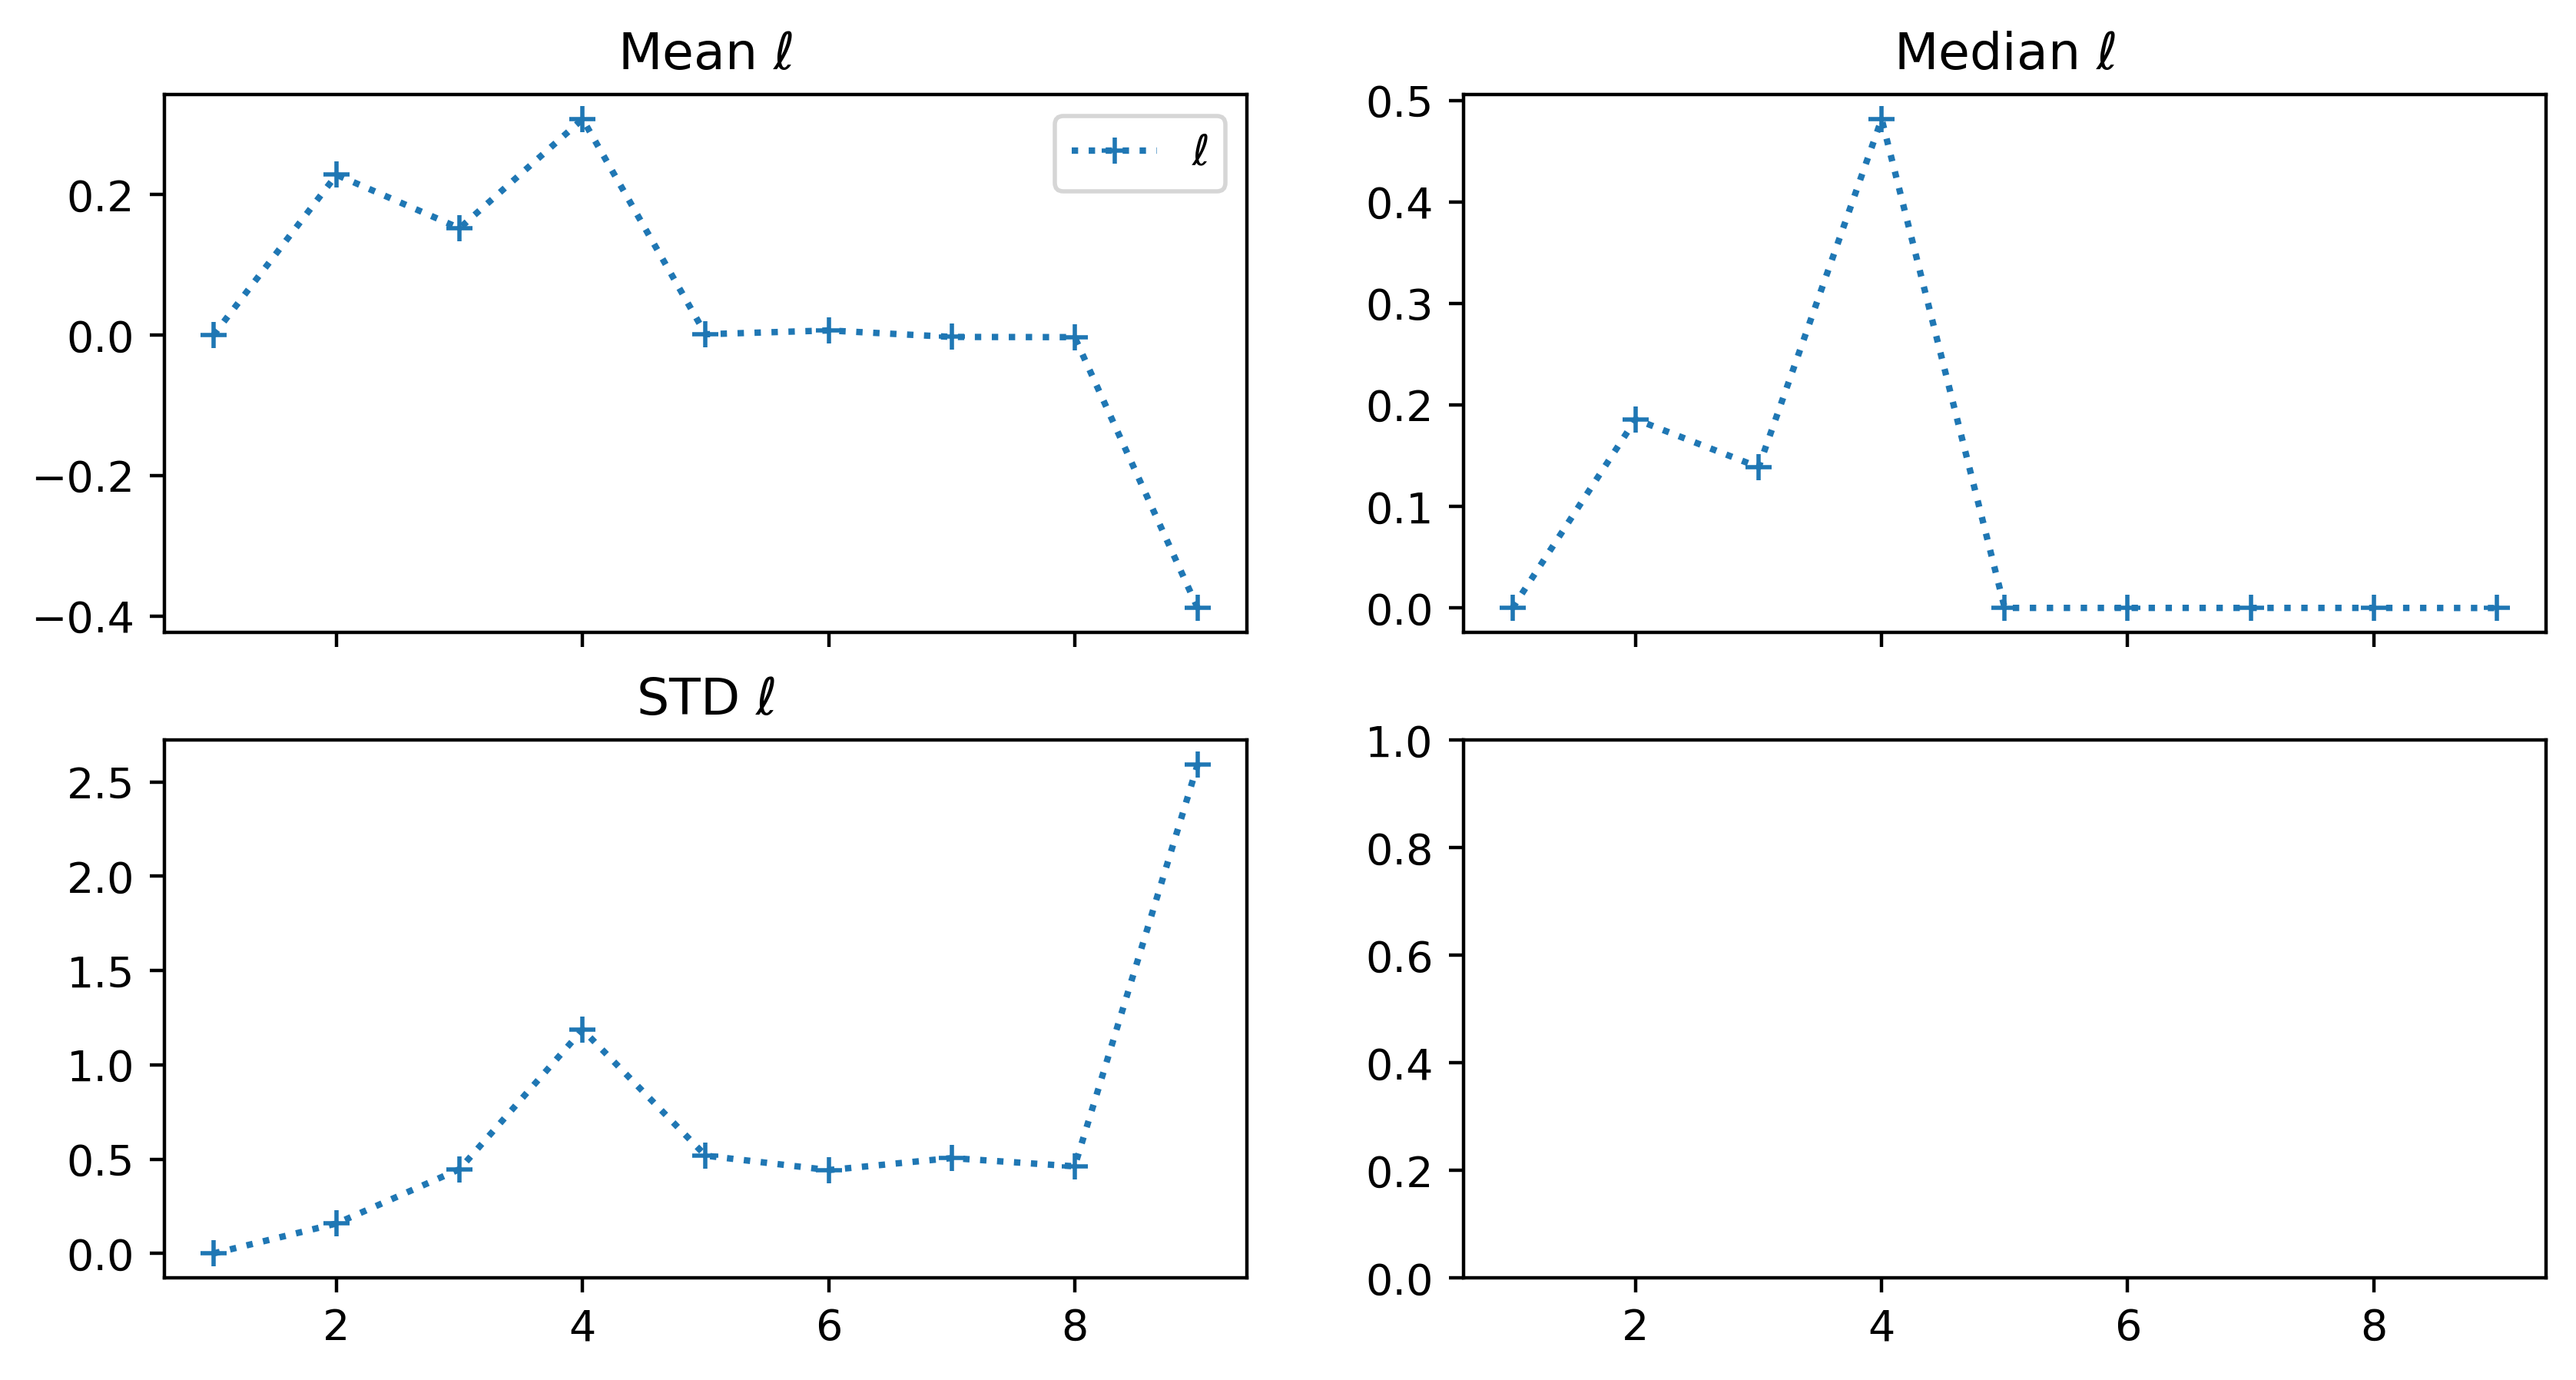

In [136]:
f , ax  = plt.subplots(2,2,figsize=(10,5),dpi=400,sharex = True);
for i in range(0,n):
    if i == 0:
        x0 = np.array([[i+1,data[str(i)]['ell']['mean']]])
        x1 = np.array([[i+1,data[str(i)]['ell']['median']]]) 
        x2 = np.array([[i+1,data[str(i)]['ell']['std']]])        
    elif i == 1:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
        # y0 = np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])
        # z0 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
        # y1 = np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])
        # z1 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
        # y2 = np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])
        # z2 = np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])
    else:
        x0 = np.concatenate((x0,np.array([[i+1,data[str(i)]['ell']['mean']]])),axis=0)
        # y0 = np.concatenate((y0,np.array([[i+1,data[str(i)]['nabla u * ell']['mean']]])),axis=0)
        # z0 = np.concatenate((z0,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['mean']]])),axis=0)
        x1 = np.concatenate((x1,np.array([[i+1,data[str(i)]['ell']['median']]])),axis=0)
        # y1 = np.concatenate((y1,np.array([[i+1,data[str(i)]['nabla u * ell']['median']]])),axis=0)
        # z1 = np.concatenate((z1,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['median']]])),axis=0)
        x2 = np.concatenate((x2,np.array([[i+1,data[str(i)]['ell']['std']]])),axis=0)
        # y2 = np.concatenate((y2,np.array([[i+1,data[str(i)]['nabla u * ell']['std']]])),axis=0)
        # z2 = np.concatenate((z2,np.array([[i+1,data[str(i)]['min(nabla u , ell)']['std']]])),axis=0)
ax[0][0].plot(x0[:,0],x0[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[0][0].plot(y0[:,0],y0[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[0][0].plot(z0[:,0],z0[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[0][0].plot(x0[:,0],data['optimal']*np.ones(x0.shape[0]),label='target');
ax[0][0].set_title(r'Mean $\ell$');
# ax[0][0].set_xticks s([int(l) for l in x0[:,0]])
ax[0][1].plot(x1[:,0],x1[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[0][1].plot(y1[:,0],y1[:,1],label = r'$\nabla u \ell$',linestyle='-.', marker='*')
# ax[0][1].plot(z1[:,0],z1[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[0][1].plot(x1[:,0],data['optimal']*np.ones(x1.shape[0]),label='target');
ax[0][1].set_title(r'Median $\ell$');
ax[1][0].plot(x2[:,0],x2[:,1],label = r'$\ell$',linestyle=':', marker='+')
# ax[1][0].plot(y2[:,0],y2[:,1],label = r'$\ell\nabla u$',linestyle='-.', marker='*')
# ax[1][0].plot(z2[:,0],z2[:,1],label = r'$(-\nabla u) \vee(\nabla u \wedge \ell)$',linestyle='--', marker='o')
# ax[1][0].plot(x2[:,0],np.zeros(x0.shape[0]),label='target');
ax[1][0].set_title(r'STD $\ell$');
ax[0][0].legend();